# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [17]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset.
crops = pd.read_csv("soil_measures.csv")

# 1.View the first rows of the DataFrame.
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [18]:
# 1.Summary data of the DataFrame.
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [19]:
# 1.Checking for missing values.
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [20]:
# 1.Checking for crop types.
crops['crop'].nunique()

22

In [21]:
# 1.Check how many crops we have, i.e., multi-class target.
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [22]:
# 1.Determining the number of each crop.
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [23]:
# 2.Features variables.
X = crops.drop(columns='crop')
X.shape

(2200, 4)

In [24]:
# 2.Target variables.
y = crops['crop']
y.shape

(2200,)

In [25]:
# 2.Split the dataset into 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 3.Training a logistic regression model for each feature.
for x in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=2000,multi_class='multinomial')
    log_reg.fit(X_train[[x]], y_train)
    y_pred = log_reg.predict(X_test[[x]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {x}: {f1}")

F1-score for N: 0.10251263642245952
F1-score for P: 0.13310868837820025
F1-score for K: 0.2085392131428318
F1-score for ph: 0.04532731061152114


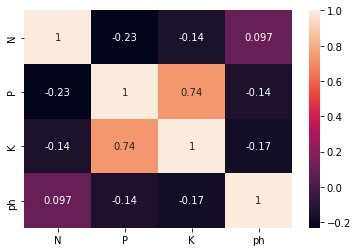

In [27]:
# 4.Calculate the correlation matrix and create a heatmap using seaborn.
c = crops.corr()
sns.heatmap(c, annot=True)
plt.show();

In [28]:
# 5.Select the final features for the model.
features = crops.drop(columns=['crop', 'P'])

# Split the data with the final features.
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features, y, test_size=0.2, random_state=42)

# Train a new model and evaluate performance
log_reg_f = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg_f.fit(X_train_f, y_train_f)
y_pred_f = log_reg_f.predict(X_test_f)
model_performance = f1_score(y_test_f, y_pred_f, average="weighted")
print(f"F1-score: {model_performance}")

F1-score: 0.5680661637667795
